In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_all = pd.read_csv('data_all.csv')
df_all.describe()

,rating
count,1.487747e+06
mean,4.452340e+00
std,9.965227e-01
min,1.000000e+00
25%,4.000000e+00
50%,5.000000e+00
75%,5.000000e+00
max,5.000000e+00


In [ ]:
df_all.user_id.nunique()

868937

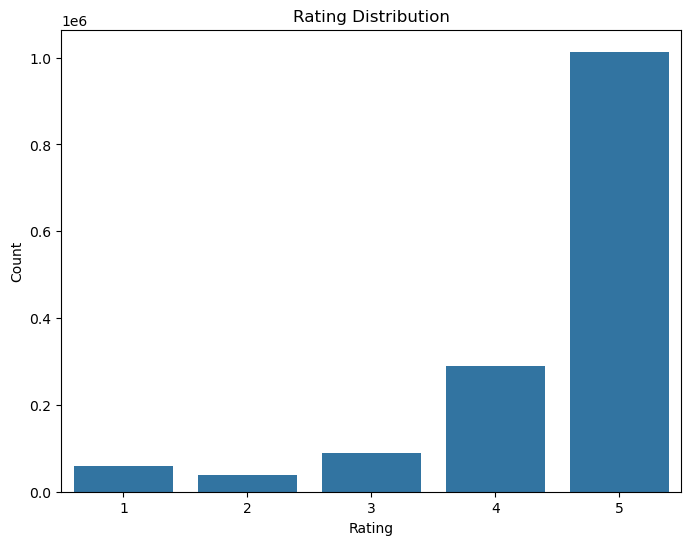

In [17]:
# Visualize Rating Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='rating', data=df_all)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

## Metadata

In [2]:
metadata_ma = pd.read_json('data/meta-Massachusetts.json', lines=True)
metadata_ma.head()

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Grace Ryder Housing Center,"Grace Ryder Housing Center, Marshfield, MA 02050",0x89e4a1f2d39fb621:0xfe62e9b7266e6262,None,42.098673,-70.719751,[Senior citizen center],4.8,3,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89e4a6ce94008f83:0x48244c8afd7f8d76, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
1,Sowing Seeds,"Sowing Seeds, 974 Plain St, Marshfield, MA 02050",0x89e4a103dd188585:0xfadc47938337579f,None,42.107184,-70.757536,[Non-profit organization],4.6,8,None,None,{'Accessibility': ['Wheelchair accessible entr...,None,"[0x89e4a6d00319316d:0x5d22d9b17e568648, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
2,TLC Kennels,"TLC Kennels, 729 Center St, Pembroke, MA 02359",0x89e49871023b3407:0xd93aabe6f7940a6b,None,42.032471,-70.820770,[Kennel],4.0,4,None,None,None,None,"[0x89e4a1c4b9d12e9b:0xc13185ea1dbed01a, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
3,Pine Hill Sand & Gravel,"Pine Hill Sand & Gravel, 498 Old Westport Rd, ...",0x89e4fcdcfa2fdba5:0xb10b326e00a0fd0,None,41.626680,-71.022437,[Sand & gravel supplier],5.0,2,None,None,None,None,"[0x89e4fd3555b4674f:0x6d70e26b40185165, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...
4,Workout Club,"Workout Club, Webster Square, Marshfield, MA 0...",0x89e4a6c554aa0e59:0x45965ec598f57a3,None,42.089767,-70.708462,[Gym],4.5,4,None,"[[Thursday, 5:30AM–1PM], [Friday, 5:30AM–1PM],...",{'Accessibility': ['Wheelchair accessible entr...,Closes soon ⋅ 1PM ⋅ Reopens 4PM,"[0x89e4a6d001adbf99:0xdeb84714d054a18c, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...


In [28]:
metadata_ma.avg_rating.describe()

count    92520.000000
mean         4.314888
std          0.618141
min          1.000000
25%          4.100000
50%          4.400000
75%          4.700000
max          5.000000
Name: avg_rating, dtype: float64

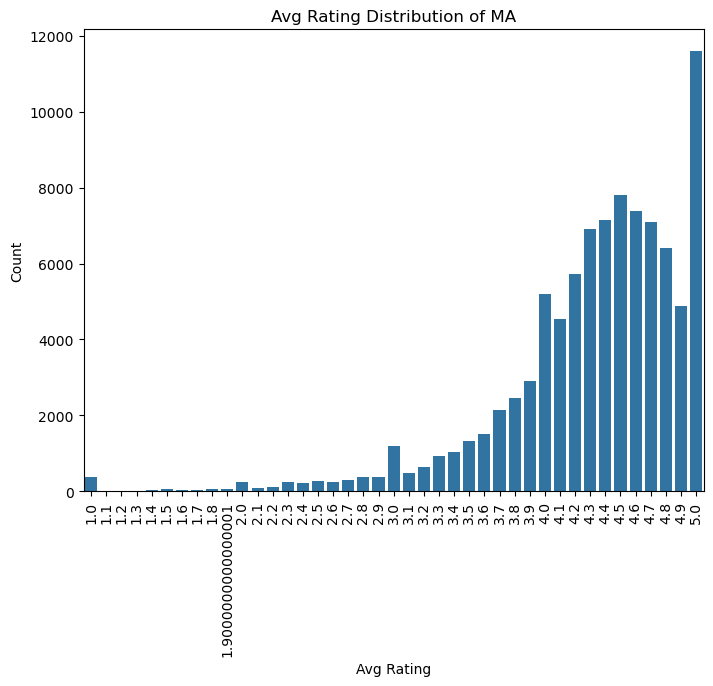

In [32]:
# Visualize Business Category
plt.figure(figsize=(8, 6))
sns.countplot(x='avg_rating', data=metadata_ma)
plt.title('Avg Rating Distribution of MA')
plt.xlabel('Avg Rating')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [27]:
metadata_ma.num_of_reviews.describe()

count    92520.000000
mean       112.916202
std        297.091231
min          1.000000
25%          8.000000
50%         28.000000
75%         98.000000
max       9998.000000
Name: num_of_reviews, dtype: float64

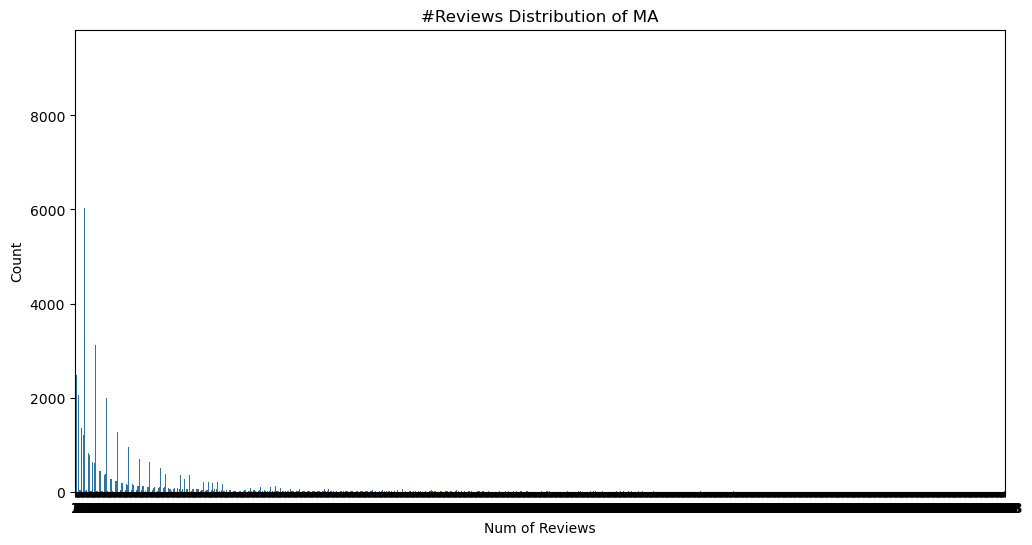

In [26]:
# Visualize Business Category
plt.figure(figsize=(12, 6))
sns.countplot(x='num_of_reviews', data=metadata_ma)
plt.title('#Reviews Distribution of MA')
plt.xlabel('Num of Reviews')
plt.ylabel('Count')
# plt.xticks(rotation=90)
plt.show()

In [22]:
if 'first_category' not in metadata_ma.columns:

    metadata_ma['first_category'] = metadata_ma['category'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else None)

metadata_ma.first_category.describe()


count          92217
unique          2523
top       Restaurant
freq            2314
Name: first_category, dtype: object

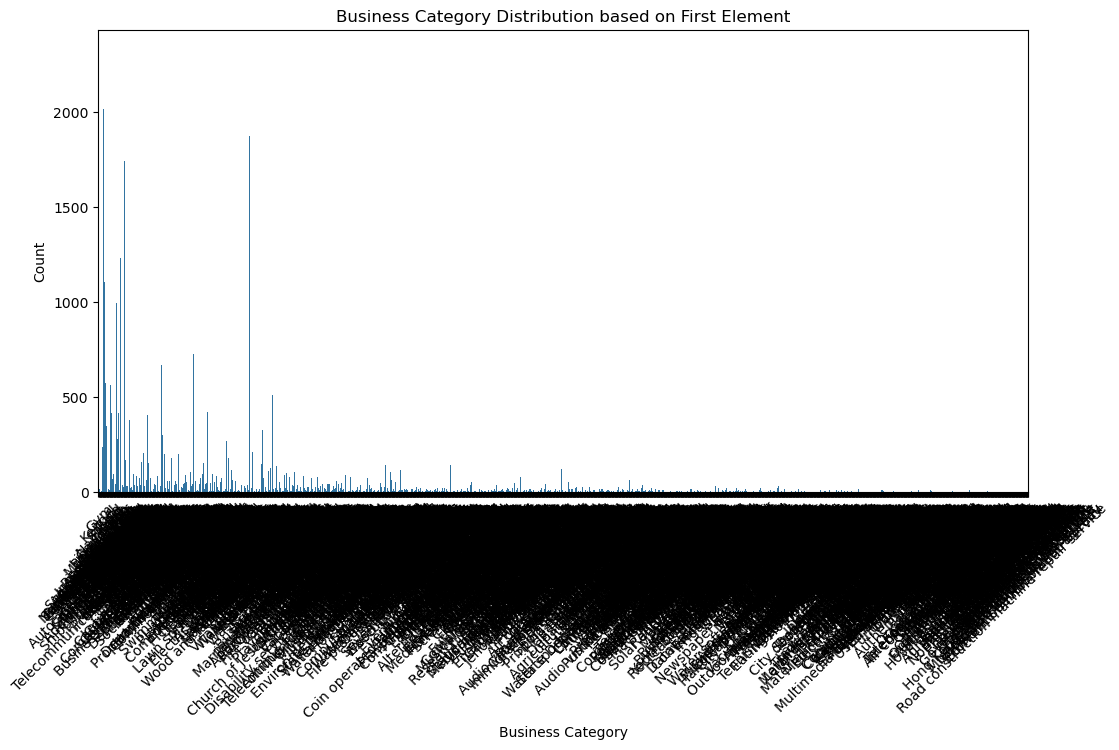

In [8]:
plt.figure(figsize=(12, 6))
sns.countplot(x='first_category', data=metadata_ma)
plt.title('Business Category Distribution based on First Element')
plt.xlabel('Business Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [10]:
metadata_ma['price'].isna().sum()

73078

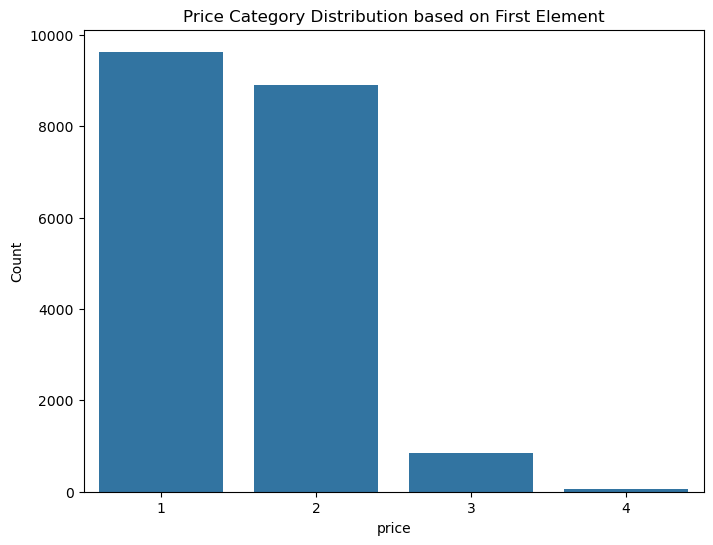

In [13]:
plt.figure(figsize=(8, 6))


valid_prices = metadata_ma['price'].dropna().astype(str)

# Calculate the length of each price string
price_lengths = valid_prices.apply(len)

sns.countplot(x=price_lengths)
plt.title('Price Category Distribution')
# plt.xlabel(['$'*p for p in range(1, 5)])
plt.ylabel('Count')
plt.show()

In [18]:
df_all.head()

,business_id,user_id,rating,review_text,pics
0,605730f68cd0e3d69a52284b,113890892872599852766,4,We came for a birthday brunch and this place i...,[{'id': 'AF1QipPrls2G30PS3tyC55KBxUrKgy3ER0AB5...
1,605730f68cd0e3d69a52284b,100158382312395993536,5,"Cool place to hang out, have drinks. There is...",[{'id': 'AF1QipPj8FEVZrdpTZmRdjoOtzQyfGYSwJ0Ub...
2,605730f68cd0e3d69a52284b,113495161718980109602,2,This place doesn’t rock the senses when it com...,[{'id': 'AF1QipOP5poDTRQ4XXIM11buv5x9Ae-BNXwcq...
3,605730f68cd0e3d69a52284b,111259544401075262963,3,Pretty cool place to hang out with friends and...,[{'id': 'AF1QipMq84NEaCMdQtfrELbudJdQbTILp_5I_...
4,605730f68cd0e3d69a52284b,104285463275063919410,5,We saw this place the other day when we had re...,[{'id': 'AF1QipOTCVzPHHWTiQO_2UZNVeG5KMbcki6d5...


In [25]:
metadata_ma[metadata_ma.first_category == 'Restaurant']

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,first_category
34,La Sanghita Cafe,"La Sanghita Cafe, 389 Maverick St, Boston, MA ...",0x89e3706a62ba248f:0xdd2878d145d53400,None,42.365695,-71.029044,[Restaurant],4.8,14,None,None,"{'Service options': ['Delivery'], 'Highlights'...",None,"[0x89e371cb53850b7f:0x7e6646ef9ede69d8, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant
213,Jay Square,"Jay Square, 500 Cummings Center #1640, Beverly...",0x89e316bb7ceaaaab:0x2b1a0e9e697640fe,None,42.562179,-70.889587,[Restaurant],4.6,18,None,"[[Wednesday, 8AM–4PM], [Thursday, 8AM–4PM], [F...","{'Service options': ['Delivery', 'Takeout', 'D...",Closes soon ⋅ 4PM ⋅ Opens 8AM Thu,"[0x89e3169e7cae3ea9:0xb07aa8892b4bff57, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant
374,Summer House Beachside Bistro,"Summer House Beachside Bistro, 16 Ocean Ave, N...",0x89fae72164e408b1:0x3d84395c91d4211b,None,41.260252,-69.964072,[Restaurant],3.2,38,None,"[[Wednesday, 11:30AM–8:30PM], [Thursday, 11:30...","{'Service options': ['Outdoor seating', 'Takeo...",Closed ⋅ Opens 11:30AM,"[0x89fadce10a3163b9:0x7a1ff6952a334094, 0x89fa...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant
571,Subway Restaurants,"Subway Restaurants, 384 Main St, Wakefield, MA...",0x89e374acad8c5953:0x57bbe51e22a8d30b,Casual counter-serve chain for build-your-own ...,42.503761,-71.070295,"[Restaurant, Caterer, Fast food restaurant, Sa...",2.6,8,$,"[[Tuesday, 7AM–9PM], [Wednesday, 7AM–9PM], [Th...","{'Service options': ['Delivery'], 'Amenities':...",Permanently closed,None,https://www.google.com/maps/place//data=!4m2!3...,Restaurant
606,Mello Vibez Restaurant,"Mello Vibez Restaurant, 473 River St, Mattapan...",0x89e37d38b448274d:0xf01dc1b37d97ccda,None,42.268259,-71.092999,[Restaurant],5.0,15,None,"[[Tuesday, 11AM–9PM], [Wednesday, 11AM–9PM], [...","{'Service options': ['Delivery', 'Takeout', 'D...",Closed ⋅ Opens 11AM Wed,None,https://www.google.com/maps/place//data=!4m2!3...,Restaurant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92453,The Blue-Eyed Crab Caribbean Grill & Rum Bar,"The Blue-Eyed Crab Caribbean Grill & Rum Bar, ...",0x89e4bb207a260947:0xb7543a0ea65fbe40,Inviting bar & grill with outdoor seating offe...,41.962431,-70.669219,[Restaurant],4.2,398,$$,"[[Saturday, 12–9PM], [Sunday, 12–5PM], [Monday...","{'Service options': ['Outdoor seating', 'Takeo...",NaN,"[0x89e4bbf6fc6f5c3d:0xff74f54ff57a3a7d, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant
92465,The Paramount,"The Paramount, 44 Charles St, Boston, MA 02114",0x89e3709efb3674a5:0xe7cd6fdc573ae73c,American comfort food institution that's cafet...,42.357255,-71.070274,[Restaurant],4.3,1395,$$,"[[Saturday, 8AM–9PM], [Sunday, 8AM–9PM], [Mond...","{'Service options': ['Curbside pickup', 'No-co...",NaN,"[0x89e37098d9a6b8f9:0xd7b5bc8af4f2031b, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant
92489,Fireside Grille,"Fireside Grille, 30 Bedford St, Middleborough,...",0x89e492e6ac3271a5:0xc9d47d485e222223,This easygoing eatery dishes up hefty portions...,41.901080,-70.960905,"[Restaurant, Banquet hall, Bar & grill, Event ...",4.1,1054,$$,"[[Friday, 11:30AM–9:30PM], [Saturday, 11:30AM–...",{'From the business': ['Identifies as women-le...,NaN,"[0x89e49318d445d5c5:0xe43f346dcf8319f4, 0x89e4...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant
92495,Beer Works,"Beer Works, 300 Terminal Dr, Boston, MA 02128",0x89e3703d22d93cbb:0x5a6aed56fd3bbb16,None,42.365810,-71.015394,"[Restaurant, Bar]",3.6,358,$$,"[[Friday, 8AM–8:30PM], [Saturday, 8AM–8:30PM],...","{'Service options': ['Takeout', 'Delivery'], '...",NaN,"[0x89e37047eee2b3eb:0x5d396d1d11685961, 0x89e3...",https://www.google.com/maps/place//data=!4m2!3...,Restaurant


In [19]:
# data_ma = pd.merge(df_all, metadata_ma, left_on='business_id', right_on='gmap_id', how='inner')


In [26]:
# review_ma = pd.read_json('data/review-Massachusetts.json', lines=True)
# review_ma.head()

: 